## Project Submission

Please fill out:
* Student name: Daniel Bradley and Monica Haderthauer
* Student pace: full time
* Scheduled project review date/time: 03/31/2022
* Instructor name: Praveen Gowtham
* Blog post URL: https://github.com/DanlBradley/Phase2Project


In [2]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

## Initial inspection and cleaning
- Clean up DataFrame, drop NaN entries if there is sufficient data, and look for NaN entries that go under a placeholder name
- Split DataFrame into numerics and categorical variables
- Basic feature engineering such as 'price / sqfoot' column and 'renovated vs. not renovated' column

In [3]:
#Create housing dataframe
df = pd.read_csv('data/kc_house_data.csv')
#Clean up NaNs
df['sqft_basement'] = df['sqft_basement'].replace('?',np.nan)
df.drop(columns = 'sqft_lot15')
df = df.dropna()


#Convert date string to datetime
df['date'] = pd.to_datetime(df['date'])


#Convert sqft_basement to a float
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: float(x))


#Add categorical column "renovated" vs "not renovated"
df['renovated_status'] = df['yr_renovated'].apply(lambda x: 'NO' if x == 0 else 'YES')


#Add a price / sqfoot column
df['price_per_sqfoot'] = df['price'] / df['sqft_above']

In [4]:
#Create dataframe for just numerics
df_numerics = df.select_dtypes(include = np.number, exclude = object)

#Select a target metric to compare other columns to
target_metric = 'price_per_sqfoot'

In [5]:
#Create a categorical dataframe
df_cat = df[['waterfront','view','condition','grade','renovated_status']]

In [6]:
#Make a multiple linear regression model to check parameters performance on predicting target metric (chosen above in cell 3)
y = df_numerics[target_metric]
x = sm.add_constant(df_numerics.drop(columns=[target_metric,'id','yr_renovated','zipcode','sqft_lot15']))
model = sm.OLS(y,x).fit()

/Users/danielbradley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


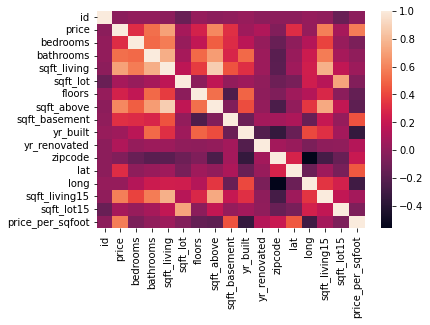

In [7]:
import seaborn as sns

#Correlation matrix
Var_Corr = df_numerics.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=False);

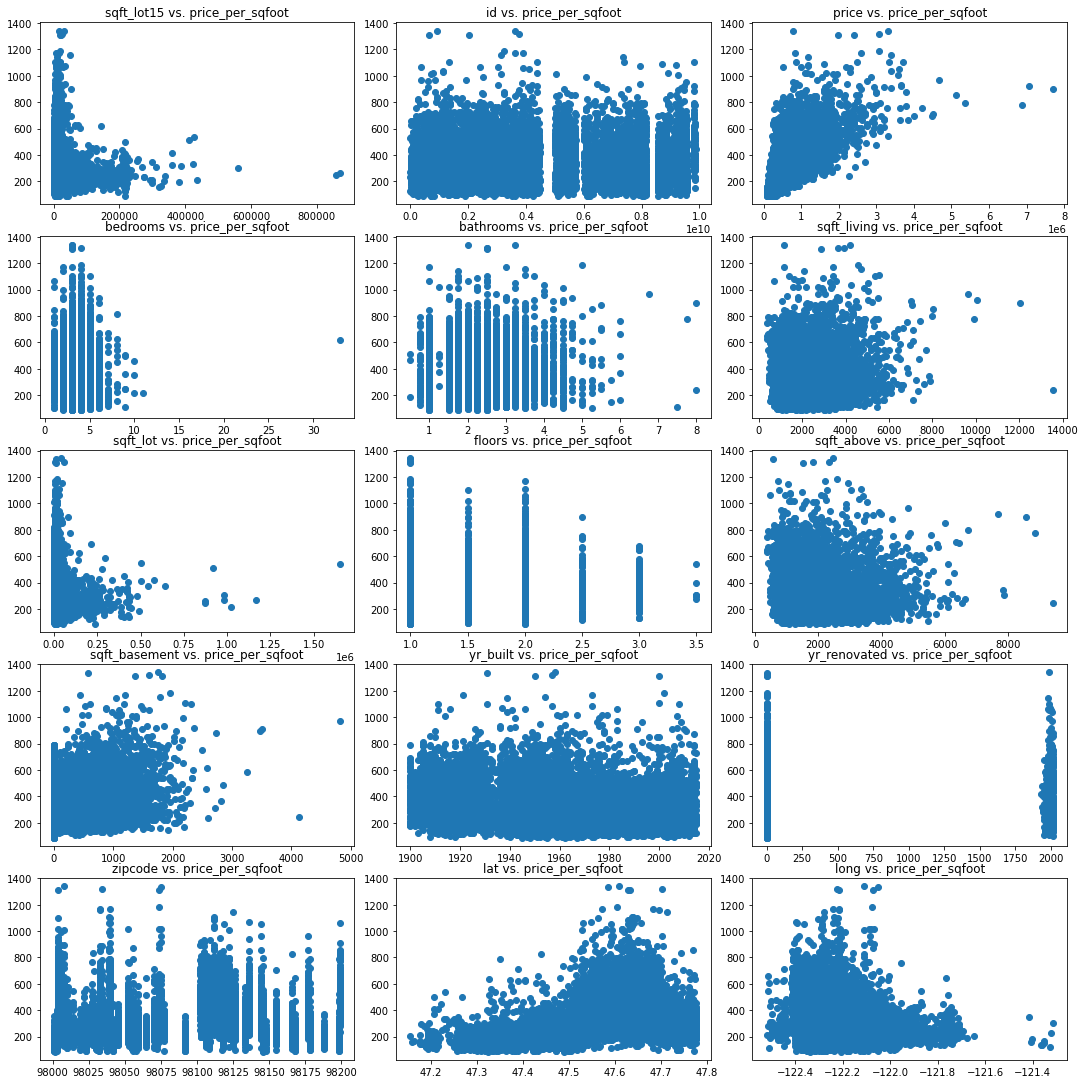

In [8]:
fig, axs = plt.subplots(5,3)


fig.set_figheight(15)
fig.set_figwidth(15)
plt.tight_layout()
independants = df_numerics.drop(columns=target_metric)
dependant = df_numerics[target_metric]
column_num = 0

for i in range(5):
    for j in range(3):
        axs[i,j].scatter(independants.iloc[:,(column_num-1)],dependant)
        axs[i,j].set_title('{} vs. {}'.format(independants.columns[column_num-1], target_metric))
        column_num += 1

In [9]:
import folium
df_renovated = df_numerics.loc[df_numerics['yr_renovated'] != 0]
lat = df_renovated['lat']
long = df_renovated['long']

#Create a map of the area
base_map = folium.Map([lat.mean(), long.mean()], zoom_start=13)

for lat1,long1 in zip(lat,long):
     popup_text = 'Lat: {} \n Long: {}'.format(lat1,long1)
     popup = folium.Popup(popup_text, parse_html=True)
     marker = folium.Marker(location=[lat1, long1], popup = popup)
     marker.add_to(base_map)
     
base_map


In [10]:
df_numerics.loc[df_numerics['lat'] == 47.6036]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqfoot
1333,8961990160,567500.0,3,2.5,2080,4556,2.0,2080,0.0,1999,0.0,98074,47.6036,-122.014,1530,5606,272.836538
12830,9826701345,498000.0,3,2.5,1620,2640,2.0,1620,0.0,1900,1993.0,98122,47.6036,-122.305,1370,3840,307.407407


## Combining seattle AirBNB data with seattle housing data 
- Determine a predictive model for homes doing well in airbnb vs. the housing data
- Then make inferences about what to look for in a home when buying as an AirBNB investment

In [107]:
bnb_listings = pd.read_csv('data/earnings_data.csv')
bnb_listings['longitude'] = round(bnb_listings['longitude'],3)
bnb_listings['long'] = round(bnb_listings['longitude'],3)
bnb_listings['latitude'] = round(bnb_listings['latitude'],3)
bnb_listings['lat'] = round(bnb_listings['latitude'],3)

In [108]:
merged = df.merge(bnb_listings, how = 'inner', on = ['long','lat'])

In [109]:
lat = merged['lat']
long = merged['long']

#Create a map of the area
base_map = folium.Map([lat.mean(), long.mean()], zoom_start=12)

for lat1,long1 in zip(lat,long):
     popup_text = 'Lat: {} \n Long: {}'.format(lat1,long1)
     popup = folium.Popup(popup_text, parse_html=True)
     marker = folium.Marker(location=[lat1, long1], popup = popup)
     marker.add_to(base_map)
     
base_map;

In [110]:
print(list(merged.columns))

['id_x', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode_x', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated_status', 'price_per_sqfoot', 'Unnamed: 0', 'id_y', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode_y', 'market

In [121]:
merged_numerics = merged.select_dtypes(include = np.number, exclude = object)
merged_numerics = merged_numerics.drop(columns = ['square_feet','license'])
merged_numerics = merged_numerics.dropna()
merged_numerics.shape

(68, 41)

In [122]:
#Make a multiple linear regression model to check parameters performance on predicting target metric (chosen above in cell 3)
# bnb_metric = 'avg_earnings'
# y = merged_numerics[bnb_metric]
# x = sm.add_constant(merged_numerics.drop(columns=[bnb_metric]))
# model = sm.OLS(y,x).fit()
# model.summary()

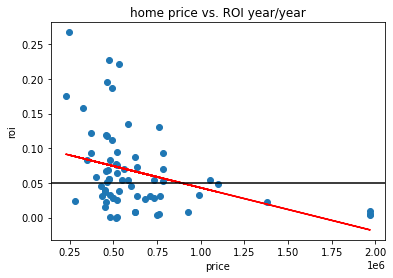

In [123]:
#Parameterized cell to let you scatter two variables from merged_numerics
merged_numerics['roi'] = (merged_numerics['avg_earnings'] * 365) / merged_numerics['price']
merged_numerics = merged_numerics.drop(columns = 'avg_earnings')
fig, ax = plt.subplots()
x = merged_numerics['price']
y = merged_numerics['roi']
m,b = np.polyfit(x = x, y = y, deg = 1)
plt.scatter(x,y)
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.title('home {} vs. ROI year/year'.format(x.name))
plt.plot(x,x*m+b, c= 'r')
plt.axhline(.05, c = 'black');


In [124]:
#Make a multiple linear regression model to check parameters performance on predicting target metric (chosen above in cell 3)
bnb_metric = 'roi'

y = merged_numerics[bnb_metric]
x = sm.add_constant(merged_numerics.drop(columns=[bnb_metric]))
model = sm.OLS(y,x).fit()

#Filter out variables above a critical p-value
pcrit = .3
pvals = model.pvalues.to_dict()
drop_list = []
for key,val in pvals.items():
    if val > pcrit:
        drop_list.append(key)

model.summary()

/Users/danielbradley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roi   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     3.422
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           0.000267
Time:                        23:27:27   Log-Likelihood:                 144.50
No. Observations:                  68   AIC:                            -223.0
Df Residuals:                      35   BIC:                            -149.8
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
id_x                           -1.337e-12   2.64e-12     -0.507      0.615   -6.69e-12    4.02e-12
price                           7.264e-09   7.77e-08      0.093      0.926   -1.51e-07    1.65e-07
bedrooms                           0.0045      0.008      0.581      0.565      -0.011       0.020
bathrooms                          0.0155      0.019      0.833      0.410      -0.022       0.053
sqft_living                    -9.005e-05   5.91e-05     -1.523      0.137      -0.000       3e-05
sqft_lot                        5.431e-06   2.87e-06      1.894      0.067   -3.92e-07    1.13e-05
floors                            -0.0161      0.021     -0.764      0.450      -0.059       0.027
sqft_above                      4.786e-05   5.63e-05      0.851      0.401   -6.64e-05       0.000
sqft_basement                   7.996e-05   5.58e-05      1.432      0.161   -3.34e-05       0.000
yr_built                       -8.675e-05      0.000     -0.245      0.808      -0.001       0.001
yr_renovated                    4.624e-06   1.37e-05      0.337      0.738   -2.32e-05    3.25e-05
zipcode_x                          0.0005      0.001      0.518      0.608      -0.001       0.003
lat                                0.1619      0.109      1.480      0.148      -0.060       0.384
long                               0.1077      0.113      0.955      0.346      -0.121       0.337
sqft_living15                  -1.165e-05   2.12e-05     -0.550      0.586   -5.46e-05    3.13e-05
sqft_lot15                     -2.999e-06   5.27e-06     -0.569      0.573   -1.37e-05     7.7e-06
price_per_sqfoot                  -0.0001      0.000     -1.000      0.324      -0.000       0.000
Unnamed: 0                      6.675e-07   7.68e-06      0.087      0.931   -1.49e-05    1.62e-05
id_y                             4.94e-09   3.69e-09      1.339      0.189   -2.55e-09    1.24e-08
scrape_id                      -1.975e-12      5e-12     -0.395      0.696   -1.21e-11    8.18e-12
host_listings_count               -0.0055      0.008     -0.738      0.466      -0.021       0.010
host_total_listings_count         -0.0055      0.008     -0.738      0.466      -0.021       0.010
latitude                           0.1619      0.109      1.480      0.148      -0.060       0.384
longitude                          0.1077      0.113      0.955      0.346      -0.121       0.337
accommodates                       0.0122      0.006      2.117      0.041       0.000       0.024
guests_included                   -0.0049      0.006     -0.835      0.409      -0.017       0.007
minimum_nights                    -0.0090      0.009     -1.022      0.314      -0.027       0.009
maximum_nights                 -5.709e-07   1.63e-05     -0.035      0.972   -3.37e-05    3.26e-05
availability_9

In [125]:
merged_numerics = merged_numerics.drop(columns = drop_list)
y = merged_numerics[bnb_metric]
x = sm.add_constant(merged_numerics.drop(columns=[bnb_metric]))
model = sm.OLS(y,x).fit()
model.summary()

/Users/danielbradley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roi   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     7.360
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           2.36e-07
Time:                        23:27:33   Log-Likelihood:                 124.47
No. Observations:                  68   AIC:                            -226.9
Df Residuals:                      57   BIC:                            -202.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -6.8402      5.885     -1.162      0.250     -18.624       4.944
sqft_living                 -1.412e-05   9.62e-06     -1.469      0.147   -3.34e-05    5.13e-06
sqft_lot                     2.374e-06   1.48e-06      1.600      0.115   -5.98e-07    5.35e-06
sqft_basement               -9.501e-06   2.07e-05     -0.459      0.648   -5.09e-05    3.19e-05
lat                             0.0630      0.062      1.012      0.316      -0.062       0.188
id_y                         3.338e-09   1.85e-09      1.803      0.077   -3.69e-10    7.05e-09
latitude                        0.0630      0.062      1.012      0.316      -0.062       0.188
accommodates                    0.0112      0.003      3.781      0.000       0.005       0.017
availability_90                 0.0009      0.000      5.595      0.000       0.001       0.001
review_scores_rating            0.0051      0.002      2.358      0.022       0.001       0.009
review_scores_communication     0.0536      0.027      1.966      0.054      -0.001       0.108
review_scores_value            -0.0218      0.016     -1.397      0.168      -0.053       0.009
==============================================================================
Omnibus:                       18.042   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.585
Skew:                           1.107   Prob(JB):                     7.56e-06
Kurtosis:                       4.849   Cond. No.                     2.48e+24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.58e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [126]:
def generate_collinearity_pairs(x):

    # save absolute value of correlation matrix as a data frame
    # converts all values to absolute value
    # stacks the row:column pairs into a multindex
    # reset the index to set the multindex to seperate columns
    # sort values. 0 is the column automatically generated by the stacking

    df=x.corr().abs().stack().reset_index().sort_values(0, ascending=False)

    # zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
    df['pairs'] = list(zip(df.level_0, df.level_1))

    # set index to pairs
    df.set_index(['pairs'], inplace = True)

    #d rop level columns
    df.drop(columns=['level_1', 'level_0'], inplace = True)

    # rename correlation column as cc rather than 0
    df.columns = ['cc']

    # drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
    # for the sake of exercise, kept it in.
    df.drop_duplicates(inplace=True)

    return df

In [128]:
df = generate_collinearity_pairs(merged_numerics)
df[(df.cc>.5) & (df.cc <1)]

,cc
pairs,
"(sqft_living, sqft_basement)",0.652839
"(review_scores_rating, review_scores_value)",0.645713


In [133]:
cleaned_bnb_and_housing_data = merged_numerics.drop(columns = ['lat','id_y'])
cleaned_bnb_and_housing_data.to_csv('data/cleaned_bnb_and_housing_numerics.csv')

In [142]:
cleaned_bnb_and_housing_data = pd.read_csv('data/cleaned_bnb_and_housing_numerics.csv')
cleaned_bnb_and_housing_data = cleaned_bnb_and_housing_data.loc[cleaned_bnb_and_housing_data['sqft_lot'] < 15000]

IndexError: index 3 is out of bounds for axis 0 with size 3

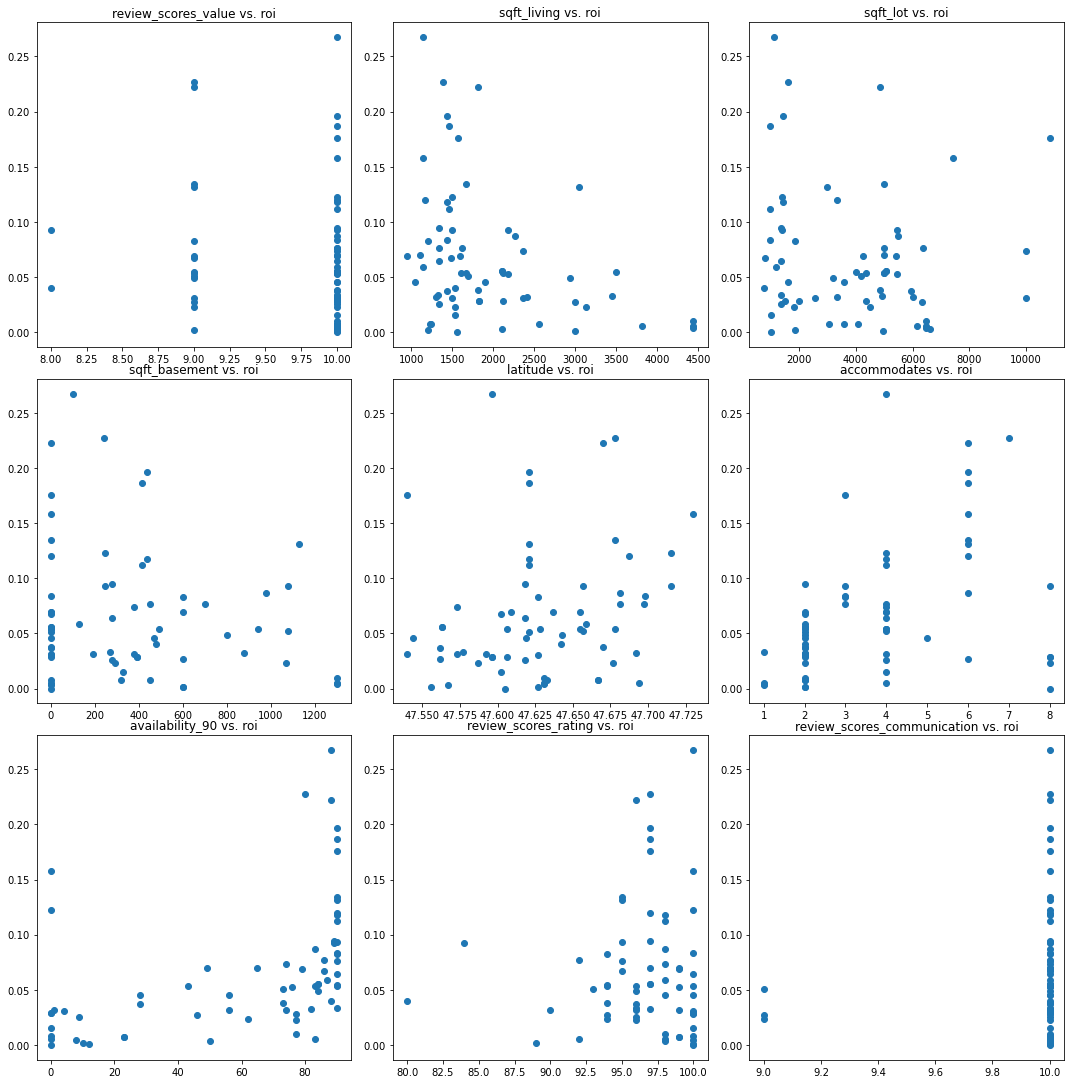

In [171]:
fig, axs = plt.subplots(3,3)
bnb_metric = 'roi'
fig.set_figheight(15)
fig.set_figwidth(15)
plt.tight_layout()
independants = cleaned_bnb_and_housing_data.drop(columns=bnb_metric)
dependant = cleaned_bnb_and_housing_data[bnb_metric]
column_num = 0

for i in range(5):
    for j in range(3):
        axs[i,j].scatter(independants.iloc[:,(column_num-1)],dependant)
        axs[i,j].set_title('{} vs. {}'.format(independants.columns[column_num-1], bnb_metric))
        column_num += 1

## Interpret results above
I view the results above as showing that the combination of reviews

In [172]:
#This cell is just to take a look at some of the categorical columns vs. sales
merged.groupby('bedrooms_x')[target_metric].mean().sort_values().plot.barh();

KeyError: 'bedrooms_x'

In [173]:
#look at above average ROI homes
mean_roi = cleaned_bnb_and_housing_data['roi'].mean()
successful_units = cleaned_bnb_and_housing_data.loc[cleaned_bnb_and_housing_data['roi'] > .05]

In [174]:
successful_units = successful_units.merge(merged[['sqft_lot','sqft_living','accommodates','long','thumbnail_url']], how = 'inner', on = ['sqft_lot','sqft_living','accommodates'])

In [179]:
lat = successful_units['latitude']
long = successful_units['long']

#Create a map of the area
base_map = folium.Map([lat.mean(), long.mean()], zoom_start=13)
i=0
for lat1,long1 in zip(lat,long):
     popup_text = 'Lat: {} \n Long: {} \n ROI: {}%'.format(lat1,long1,100*round(successful_units['roi'][i],4))
     popup = folium.Popup(popup_text, parse_html=True)
     marker = folium.Marker(location=[lat1, long1], popup = popup)
     marker.add_to(base_map)
     i+=1
     
base_map

In [188]:
successful_units.rename(columns = {'latitude': 'Latitude', 'long': 'Longitude'},inplace=True)

In [187]:
#This cell taken from Dave Fisher-Hickey from Kaggle guide: How to: Folium for maps, heatmaps & time data
#https://www.kaggle.com/code/daveianhickey/how-to-folium-for-maps-heatmaps-time-data/notebook
successful_units.rename(columns = {'lat': 'Latitude', 'long': 'Longitude'},inplace=True)
df_acc = successful_units

from folium import plugins
from folium.plugins import HeatMap


map_hooray = folium.Map(location=[df_acc['Latitude'].mean(), df_acc['Longitude'].mean()],
                    zoom_start = 11) 

# Ensure you're handing it floats
df_acc['Latitude'] = df_acc['Latitude'].astype(float)
df_acc['Longitude'] = df_acc['Longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df = df_acc[['Latitude', 'Longitude']]
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_hooray)

# Display the map
map_hooray

